# 2018-02-06 DeLong and Olney Macroeconomics 3rd Edition ch 5: The Reality of Economic Growth

## Setting up the Python/Jupyter environment

In [1]:
%%javascript

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;}

<IPython.core.display.Javascript object>

In [2]:
# keep output cells from shifting to autoscroll: little scrolling
# subwindows within the notebook are an annoyance...

In [3]:
# set up the environment by reading in every library we might need: 
# os... graphics... data manipulation... time... math... statistics...

import sys
import os
from urllib.request import urlretrieve

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image

import pandas as pd
from pandas import DataFrame, Series
from datetime import datetime

import scipy as sp
import numpy as np
import math
import random

import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# report library versions...

/Users/delong/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
%matplotlib inline 

# put graphs into the notebook itself...

In [5]:
# graphics setup: seaborn-whitegrid and figure size...

plt.style.use('seaborn-whitegrid')

figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 12
figure_size[1] = 9
plt.rcParams["figure.figsize"] = figure_size

# 5 The Reality of Economic Growth

**QUESTIONS**:

1. What Is modern economic growth?
2. What was the post-1973 productivity growth slowdown
3. What were its causes?
4. Why has American growth been so rapid since 1995?
5. Why are some nations so (relatively) rich and other nations so (relatively) poor?
6. What policies can speed up economic growth? What policy mistakes can slow it down?
7. What are the prospects for successful and rapid nomic development in tomorrow's world? ^

----

&nbsp;

We are used to modern economic growth. We are used to having production rise by 3 percent to 4 percent each year and productivity rise by 2 percent to 3 per  cent each year. In our time, a year in which production stagnates or falls is unusual. In the United States, only 6 of the last 50 years have seen real GDP lower than that of the year before.

For most of human history, however, things have been very different. Since the invention of agriculture roughly 10,000 years ago (and, as far as we know, before that), economic progress was generally glacial or nonexistent. The transition to our modern era of growth took place about two centuries ago, with what is called the Industrial Revolution.

This chapter surveys the history of economic growth — especially of modern economic growth — and also attempts to peer into the future. It is informed by the models of economic growth set out in Chapter 4, but it does not depend on them; the theory tells us what questions to ask, but the questions and answers stand on their own.

The chapter opens with a survey of what the economy looked like before the Industrial Revolution, before the transition to the age of modern economic growth. It continues with the story of the Industrial Revolution and modern economic growth in the United States, before widening its view to take a look at modern economic growth all over the world. It concludes with a brief sketch of the relationship between economic policies and economic growth.

----

&nbsp;

# 5.1 Before Modern Economic Growth

## 5.1.1 The Agrarian Age

### 5.1.1.1 Slow Population Growth

Taking what we know and what we guess about the economy from back in the deep mists of time up to today produces a picture like that of Table 5.1.1.

&nbsp;

**Table 5.1.1: Global Human Population**
<img style="display:block; margin-left:auto; margin-right:auto;" src="http://delong.typepad.com/.a/6a00e551f08003883401bb09f2ea77970d-pi" alt="Populations" title="Populations.png" border="0" width="555" height="65" />

###### Source: Joel Cohen, How Many People Can the Earth Support? (New York: Norton, 1995).

&nbsp;

The numbers in Table 5.1.1 are—save for the past century — guesses,and shaky guesses. 

Nevertheless, they do tell a coherent and consistent story.

Until the Industrial Revolution of the late eighteenth century began in Britain — until 1800 or so — the human population of the world grew only as rapidly as a glacier moves, as shown in Figure 5.1.1. Population growth between 8000 BC and AD 1800 averaged less than one-tenth of a percent per year. Nevertheless, the cumulative magnitude of population growth was impressive; over a long-enough time span even glaciers can move very far. 10,000 years is a long time indeed. Preindustrial population growth carried the number of human beings alive on this planet from perhaps 5 million in 8000 BC to 900 million in AD 1800.

Since 1800 things have been very different: A population explosion from 1800 to date, with the rate of increase peaking in the mid-twentieth century, and since then declining, with (perhaps) zero population growth on the horizon in 2050 or so. The population explosion carried the total world population to 6 billion before the year 2000. Population growth on a world scale accelerated from a rate of 0.2 percent per year between 1500 and 1800, to 0.6 percent per year between 1800 and 1900, to 0.9 percent per year between 1900 and 1950, and 1.9 percent per year between 1950 and 1975 before the first slowing of the global rate of population growth — 1.6 percent per year from 1975 to 2000.

&nbsp;

**Figure 5.1.1: Human Long Run Demographic History**

<img style="display:block; margin-left:auto; margin-right:auto;" src="http://delong.typepad.com/.a/6a00e551f08003883401b8d2d9fea0970c-pi" alt="2018 02 06 DeLong and Olney Macro 3rd Ch 5 The Reality of Economic Growth" title="2018-02-06_DeLong_and_Olney_Macro_3rd_Ch_5_The_Reality_of_Economic_Growth.png" border="0" width="600" />

In [18]:
# HUMAN POPULATION OVER THE LAST 10000 YEARS

# make sure the standard libraries are active

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image

Population = (
    [-8000,5],
    [-4000, 7],
    [-2000, 27],
    [-1000, 50],
    [-500, 100],
    [-200, 150],
    [0, 170],
    [200, 190],
    [400, 190],
    [600, 200],
    [800, 230],
    [1000, 265],
    [1200, 360],
    [1400, 350],
    [1500, 425],
    [1600, 545],
    [1700, 610],
    [1750, 720],
    [1800, 900],
    [1850, 1200],
    [1875, 1325],
    [1900, 1625],
    [1925, 1875],
    [1950, 2516],
    [1975, 4000],
    [2000, 6100],
    [2015, 7250])

Population = np.array(Population)
Pop_df = pd.DataFrame(Population) 
Pop_df.columns = ['Date', 'Population']


Pop_df['Growth_Rate'] = 0.0
Pop_df['Year'] = 0.0

for i in range(26):
    Pop_df.Growth_Rate[i] = (np.log(Pop_df.Population[i+1]/Pop_df.Population[i])/(Pop_df.Date[i+1]-Pop_df.Date[i]))
    Pop_df.Year[i] = Pop_df.Date[i]
    
Pop_df = Pop_df.set_index('Date')

Pop_df.Growth_Rate[2015] = 0.009

Pop_df

/Users/delong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/delong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/delong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Population,Growth_Rate,Year
Date,,,
-8000,5,0.000084,-8000.0
-4000,7,0.000675,-4000.0
-2000,27,0.000616,-2000.0
-1000,50,0.001386,-1000.0
-500,100,0.001352,-500.0
-200,150,0.000626,-200.0
0,170,0.000556,0.0
200,190,0.000000,200.0
400,190,0.000256,400.0


In [7]:
Pop_Table = Pop_df.take([0, 1, 3, 6, 9, 11, 14, 18, 21, 23, 25, 26])

Pop_Table.transpose()

Date,-8000,-4000,-1000,0,600,1000,1500,1800,1900,1950,2000,2015
Population,5.000000,7.000000,50.000000,170.000000,200.000000,265.000000,425.000000,900.000000,1625.000000,2516.000000,6100.000000,7250.000
Growth_Rate,0.000084,0.000675,0.001386,0.000556,0.000699,0.001532,0.002487,0.005754,0.005724,0.018545,0.011514,0.009


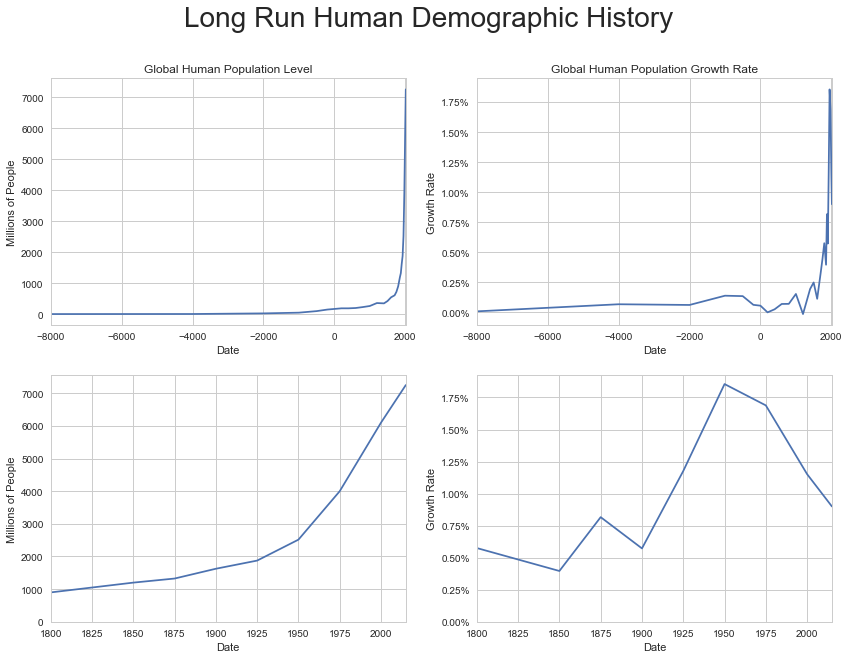

In [8]:
fig = plt.figure(figsize=(14, 10))

ax1 = plt.subplot(2,2,1)
Pop_df.Population.plot(ax = ax1, title = "Global Human Population Level")
plt.ylabel("Millions of People")
plt.xlabel("Date")
    
ax2 = plt.subplot(2,2,2)
Pop_df.Growth_Rate.plot(ax = ax2, title = "Global Human Population Growth Rate")
ax2.yaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.2%}'.format))
plt.ylabel("Growth Rate")
plt.xlabel("Date")

ax3 = plt.subplot(2,2,3)
Pop_df.Population[18:].plot(ax = ax3)
plt.ylabel("Millions of People")
plt.xlabel("Date")
plt.ylim(0,)
    
ax4 = plt.subplot(2,2,4)
Pop_df.Growth_Rate[18:].plot(ax = ax4)
ax4.yaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.2%}'.format))
plt.ylabel("Growth Rate")
plt.xlabel("Date")
plt.ylim(0,)
    
plt.suptitle('Long Run Human Demographic History', size = 28)

----

&nbsp;

### 5.1.1.2 Stagnant Living Standards

The glacial pace of human population growth before the Industrial Revolution was accompanied by complete or near-complete stagnation in median standards of living. Up until 1500, as best we can tell, there had been next to no growth in the material standard of living of the typical human for millennia. Even in 1800 the average human had a material standard of living (and an economic productivity level) at best twice that of the average human in the year 1.

Four sets of considerations make us believe that the overwhelming bulk of humans were appallingly poor, even in the sense of basic nourishment, from the discovery of agriculture on up to the Industrial Revolution era: the argument from material culture, the argument from demography, the argument from skeletons, and the argument from direct historical comparisons.

The argument from material culture is simply the basic meals and objects described and found in the written histories that have come down to us and the archeological digs that we have undertaken.

The argument from demography hinges on extremely slow human population growth from 8000 BC on up to 1500 or so. Looking over the whole globe, average population growth looks like less than 0.01% per year—less than 0.3% per generation. Over nearly ten thousand years that adds up: it was sufficient to carry human populations from 5 million to 500 million. Such is the power of compound interest, and even small exponential growth rates applied for a very long time. But we know that a healthy settled human population without widespread access to reliable artificial means of family planning and substantial female literacy will grow by between 67% and 100% over the course of a generation _if it is not nutritionally stressed_: 2% to 3% annual population and labor force growth is the rule. Populations before 1500 had little female literacy. Populations before 1500 did not have access to reliable artificial means of family planning. Your status in your culture typically depended—no matter what your gender—on being a parent of a living son. Plus there was the very strong desire to have one or more children survive to take care of you should you reach old age. After all, who else would? In an environment where life expectancy at birth was less than 25 and death from disease could strike anybody any time, the only way to have a good chance of surviving descendents was to try to have a lot of them.

And yet your typical couple before 1500 back in the Agrarian age had only 2.006 descendents survive to reproduce. If they had not been desperately nutritionally stressed, they would have left more descendents. And if they were not desperately poor, they would not ahve been that desperately nutritionally stressed.

The argument from skeletons is that the archeologists tell us that people were really short. Back before the agrarian age those skeletons we have found appear to be about as tall as we are—but they may not be representative of the entire population. Throughout the agrarian age from 8000 BC up to 1500 and beyond, people at adulthood are really short. It takes a substantial biological nutritional insult to turn a population where average adult male height would be 178 cm or 5'10" with modern nutritional standards into one with average adult male height a mere 170 cm or 5'7". Such a diet today would be called child abuse. People do not let their children go malnourished and desperately hungry if they have a choice. People richer than 2 dollars a day would have had choices.

The argument from direct historical comparisons comes from the fact that we do have solid reliable evidence of typical wage levels and living standards for some times and places. In England, monks wrote down their accounts, and their accounts have survived. Monastic records tell us what English monasteries paid to hire carpenters: a relatively skilled occupation. Monastic records tell us what monasteries paid for staples. We see that even relatively skilled workers in medieval and early modern England were desperately poor by our standards.

Was England unrepresentative? Was England thought of as particularly rich or particularly poor, ever? No. There were always some travelers' tales about how rich tyrants and plutocrats outside of England were—generally the further away, the more rich and the more marvelous. But there was little about how the common people elsewhere were noticably poorer than the common people of England until the Industrial Revolution era, by which time England was noticably richer.

Figure on something like 2 dollars/day—the standard of living of the poorest billion of the 7.5 billion people alive today—as a ballpark estimate of the standard of living and productivity level of the overwhelming bulk of humanity in the long age from 8000 BC to 1500 or 1800, in which people were typically peasants, hand craftworkers, serfs, servants, or slaves. Two dollars a day, minus today's global poor's access to the village cell phone, antibiotics, and the global culture.

&nbsp;

**Figure 5.1.2: Human Heights at Adulthood**

<img style="display:block; margin-left:auto; margin-right:auto;" src="http://delong.typepad.com/.a/6a00e551f08003883401bb09f328f4970d-pi" alt="Height estimates" title="height_estimates.png" border="0" width="600" />

###### Source: Max Roser _et al_: Our World in Data <https://ourworldindata.org/human-height>

**Figure 5.1.3: Real Wages of English Carpenters**

<img style="display:block; margin-left:auto; margin-right:auto;" src="http://delong.typepad.com/.a/6a00e551f08003883401bb09f329e1970d-pi" alt="Real Wage Builiding Workers" title="Real_Wage__Builiding_Workers_.png" border="0" width="600" />

##### Greg Clark, A Farewell to Alms

In [25]:
print(np.log(Pop_df.Population[1500]/Pop_df.Population[-8000])/(Pop_df.Year[1500] - Pop_df.Year[-8000]))

0.000467647500683


----

&nbsp;

### 5.1.1.3 Technology and Organization

The problem was not that there was no technological progress before the Industrial Revolution. There was. Humans have long been ingenious. Technology and organization opened up much land that had not previously been farmable. Technology and organization allowed people to survive on farms a tenth the size of those their ancestors millennia before had required. Warrior, priestly, and bureaucratic elites in 1500 or 1800 lived much better than their counterparts in previous millennia had lived. But just because the ruling elite lived better does not mean that other people lived any better. From 4000 BC to at least AD 1500, the typical life expectancy at birth was low (less than 30 years), and the typical adult human was short (5 feet, 4 inches or less, due to chronic undernutrition), lost his or her teeth early (although for him sugar was still a great luxury, George Washington needed false teeth because he was calcium-deprived and his body sacrificed the teeth to main  tain the bones), and ate a remarkably monotonous diet (rations for the Roman legions in AD 1 consisted of two pounds of bread per soldier per day, plus salt, plus a pint or two of wine, plus “garnishes”; rations for the British navy in 1800 were worse — save that the liquor was stronger, and the diet was supplemented by wee  vils in the crackers and enough fruit and vegetables to fight off scurvy).

Only after 1800 do we see large, sustained increases in worldwide standards of living. Worldwide, output per capita grew at perhaps 0.15 percent per year between 1500 and 1800. It grew at roughly 1 percent per year worldwide between 1800 and 1900. And material output per capita has grown at an average pace of perhaps roughly 2 percent per year, worldwide, since 1900.

----

&nbsp;

----

&nbsp;

## 5.1.2 Understanding Malthusian Economies

Why did no sustained increases in the material productivity of human labor occur before 1500? The principal reasons are two. Improvements in human technology quickly ran aground on a combination of (1) resource scarcity and (2) expanding populations. This constraint was introduced early, before the end of the eighteenth century, by Thomas R. Malthus, who became the first academic professor of economics ever (Adam Smith had been a professor of moral philosophy) at the East India Company’s Haileybury College. It was hewho diagnosed the problem. Thus we call such economies "Malthusian".

We saw above that in the long run each economy’s capital intensity K/Y tended to approach some equilibrium value and then stay there. Sustained growth in output per worker must be driven by sustained increases in the efficiency of labor. So the question, “Why no sustained increases in productivity?” is the same as the question, “Why didn’t the efficiency of labor grow?” The answer is that the efficiency of labor depends not just on the storehouse of physical and organizational technologies at workers’ disposal, but also on the natural resources available to the average worker. 

In modern times our skills at handling materials are so great that natural resources play only a small role: Soil bad? Dump some nitrogen on it. Plants too dry? Pipe water in from 300 miles away to irrigate them. Technology and capital make natural resource scarcity a much less important phenomenon now than in the past. But back before the Industrial Revolution natural resources and their scarcity played a very important role. It is no accident that for most of recorded history humanity has lived pri  marily in the great river valleys of the Nile, the Tigris and Euphrates, the Indus, the Ganges, the Yangtze, and the Yellow River — good silt and regular supplies of water were that important.

Before the Industrial Revolution, as human populations grew, the stocks of known natural resources had to be divided among more and more people. Miners had to exploit lower quality metal ores, and farmers had to farm lesser quality agri  cultural land. Over time, overcut forests vanished. Where today are the cedars of Lebanon? Over time, land that had been irrigated too long and seen too much water evaporate in the hot summer sun became poisoned with salt. What we call the northern deserts of the Middle East were once called the “Fertile Crescent” and were the home to at least a third of humanity’s farmers. The net effect of resource scarcity and human fertility was that, in spite of technological progress, the world average efficiency of labor was little, if any, greater in AD 1500 than in 1500 BC, or, indeed thousands of years earlier.

----

&nbsp;

### 5.1.2.1 From Labor Efficiency to Ideas and Natural Resources

We have our production function, output as a function of the capital stock, the product of the labor force and the efficiency with which that labor can produce, and the single parameter $ \alpha $ describing how fast diminishing returns to capital set in as the capital-labor ratio increases:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y = K^{\alpha}(EL)^{1-\alpha}  $

But what determines the efficiency of labor? Before the Industrial Revolution humans were certainly inventive. “Technology” broadly understood improved to a remarkable degree in the millennia before 1800. So why were there no improvements in the efficiency of labor?

Ideas, certainly—the level of technological knowledge in its society; its understanding and ability to implement productive organizations; plus the skills, education, and experience of the workforce. In the models of Chapter 4, we identified the efficiency of labor with “technology” broadly understood: the storehouse of techniques for manipulating matter and forms of social organization that we can use to boost the productivity of the average worker. But this in the models of Chapter 4 was a shortcut. We lumped the effect of natural resources on production into the efficiency of labor E. 

Malthus's insight was that he needed to focus on the role of resources and, in particular, _resource scarcity_ in limiting the efficiency with which labor can work. Ideas, you see, are non-rival: that one person or group has and is using an idea does not mean another person or group cannot productively use the same idea. The same is not true of natural resources. Natural resources are _rival_: crowd twice as many farmers on the same soil, and their productive efficiency is likely to drop.

And before the Industrial Revolution Malthusian considerations were often decisive. Depletion of natural resources typically offset the beneficial effects of technological improvement. So the net effect was no improvement in the efficiency of labor: a constant value of E.

TO model this, we write the efficiency of labor as a function of society's level of ideas—technology; organizational capability; plus experience, skills, and education—which we will call H, non-rival, and of society's level of resources N divided by the labor force L:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ E = \left(\frac{N}{L}\right)^{\left(\frac{1}{1+\gamma}\right)}H^{\left(\frac{\gamma}{1+\gamma}\right)}  $

With the parameter $ \gamma $ describing the ratio of the salience of ideas compared to natural resources in generating production efficiency. Why the ratio—and thus all of the $ {\gamma}/(1-\gamma) $ terms? Because the ratio will be important in some formulas later on, so why not define our production function in terms of it at the start?

We thus gain an alternative formulation of the production function when we want to peel back _resource scarcity_ as an influence lowering the efficiency of labor E:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y = K^{\alpha}N^{\left(\frac{1-\alpha}{1+\gamma}\right)}(HL)^{\left(\frac{\gamma(1-\alpha)}{1+\gamma}\right)}  $

We also note that that in this setup there is an interaction between the rate of growth of the labor force n and the rate of growth of the efficiency of labor g. Taking the natural log and then the derivative, we get expressions for the growth rate g of the efficiency of labor E:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{dln(E)}{dt} = 
\left(\frac{1}{1+\gamma}\right)
\left(\frac{dln(N)}{dt} - \frac{dln(L)}{dt} \right) +
\left(\frac{\gamma}{1+\gamma}\right)
\left(\frac{dln(H)}{dt}\right)  $

If natural resources are constant, this becomes:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{dln(E)}{dt} = 
\left(\frac{\gamma}{1+\gamma}\right)
\left(\frac{dln(H)}{dt}\right) -
\left(\frac{1}{1+\gamma}\right)
\left(\frac{dln(L)}{dt} \right) $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ g = \left(\frac{\gamma}{1+\gamma}\right)h - \left(\frac{1}{1+\gamma}\right)n  $

with "h" being the proportional rate of growth of the ideas—engineering technology; business and market organization; plus workers' skills, experience, and education—and g and n being, as before, the proportional rates of growth of labor efficiency and the labor force, respectively.

Faster population growth thus exerts a drag on the growth of the efficiency of labor...

----

&nbsp;

### 5.1.3.3 Population Growth without Output per Worker Growth?

What has to be the case such that the rate of population and labor force growth n cancels out increases in "ideas" H and leaves the efficiency of labor E stagnant?

Start from:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y}{L} = \left(\frac{K}{Y}\right)^{\left(\frac{\alpha}{1-\alpha}\right)}E  $

and thus:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y}{L} = \left(\frac{K}{Y}\right)^{\left(\frac{\alpha}{1-\alpha}\right)}H^{\left(\frac{\gamma}{1 + \gamma}\right)} N^{\left(\frac{1}{1 + \gamma}\right)} L^{\left(-\frac{1}{1 + \gamma}\right)}  $

If:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y}{L} = \bar{y}  $ and $ \frac{K}{Y} = \frac{s}{n+g+\delta}  $

then:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \bar{y} = \left(\frac{s}{n+g+\delta}\right)^{\left(\frac{\alpha}{1-\alpha}\right)} H^{\left(\frac{\gamma}{1 + \gamma}\right)} L^{\left(-\frac{1}{1 + \gamma}\right)} N^{\left(\frac{1}{1 + \gamma}\right)} $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \bar{y}  \left(\frac{n+g+\delta}{s}\right)^{\left(\frac{\alpha}{1-\alpha}\right)}  =  H^{\left(\frac{\gamma}{1 + \gamma}\right)} L^{\left(-\frac{1}{1 + \gamma}\right)} N^{\left(\frac{1}{1 + \gamma}\right)} $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$  L = H^{\gamma} 
\left[
\left(\frac{1}{\bar{y}}\right)^{\left(1+\gamma\right)}
\left(\frac{s}{n+g+\delta}\right)^{\left(\frac{\alpha(1+\gamma)}{(1-\alpha)}\right)}
\right]N $

And if the natural resources stock N is not growing, everything except the ideas stock H on the right hand side is constant. And so the proportional population and labor force growth rate under a Malthusian regime $ n^m $ is:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ n^m = \left(\frac{dln(L)}{dt}\right)^m = {\gamma}\frac{dln(H )}{dt} = {\gamma}h $

Thus we would not expect to see growth in ideas to show up as increases in output per worker levels if population growth is fast enough to keep increases in the economy's idea stock from showing up in increases in the efficiency of labor. That rate of population and labor force growth $ n^m $, superscript "m" for "Malthusian", is simply equal to $ \gamma $ times the proportional rate of increase in the idea stock h.

----

&nbsp;

### 5.1.3.4 The Malthusian Equilibration Mechanism

Thus we can have stagnant living standards and growing populations in our extended Solow growth model, but only  if improvements in ideas are just offset by the effects of diminished natural resources per capita. But how likely is it that that just happens? That population and the labor force just happen to offset each other? That the proportional rate of growth h of society's ideas stock H just happens to be equal to $ \gamma $ times the proportional rate of growth n of the labor force L?

That is implausible. There must be some biological-sociological-mechanism that works to make $ n^m = {\gamma}h $.

It was this mechanism that Thomas Robert Malthus, who became the first academic professor of economics ever (Adam Smith had been a professor of moral philosophy) at the East India Company’s Haileybury College, put his finger on. The idea is that increases in technological capability induce increases in fertility that inevitably run into natural resource scarcity. It is one of the oldest ideas in economics. And we call economies in which it holds "Malthusian".

Malthus saw a world in which inventions and higher living standards led to increases in the rate of population growth. With higher living standards there were more pregnancies and more pregnancies were successfully carried to term. Better nourished children (and adults) had a better chance of resisting diseases. More  over, when incomes were high, new farmsteads were relatively plentiful, and getting the permission of one’s father or elder brother to marry was easier. For these reasons — both social and biological — before 1800 a higher standard of living inevitably led to a faster rate of population growth. The faster rate of population growth increased the scarcity of natural resources, and so lowered productivity. After a burst of invention, population would rise and resource scarcity increase until once again people were so poor and malnourished that population growth was back at roughly zero — to less than one-tenth of one percent per year characteristic of the preindustrial age.

We can model this by setting the rate of population and labor force growth n equal to an increasing function of output per worker relative to some "subsistence" level $ \bar{y} $ like so:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ n = {\phi}ln\left(\frac{Y/L}{\bar{y}}\right)  $

with $ \phi $ (Greek _phi_, with an f sound to remind us of "fertility") describing how rapidly population and labor force increases as incomes per worker rise. $ \phi = 0.015 $—a doubling of living standards above the "subsistence" level $ \bar{y} $ increases the population and labor force growth rate from 0% to 2% per year—is in the ballpark of historical estimates.

----

&nbsp;

**Glossary**

**Malthusian age** A period in which natural-resource scarcity limits any gains from increases in technology; a larger population becomes poor and malnourished, lowering their standard of living, and ultimately lowering population growth to zero.

----

&nbsp;

In [ ]:
# FUNCTION FOR CALCULATING AND GRAPHING THE LEVELS OF 
# SOLOW GROWTH MODEL VARIABLES IN MALTHUSIAN SIMULATIONS
#
# might as well put "check that common libraries are active" as a default header
# in every long python code cell...

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import numpy as np
%matplotlib inline

# we are going to want to see what happens for lots of
# different model parameter values and ini conditions,
# so stuff our small simulation program inside a function, so 
# we can then invoke it with a single line...
#
# we are going to assume the economy starts on its ini
# balanced growth path...
#
# we are going to want to keep track not just of what the
# economy's variables are at each point in time, but also 
# what the ini and alternative balanced-growth path 
# values of variables are. Given the parameters, the new BGP 
# is attracting the economy to it at the speed (1-α)(n+g+δ), 
# closing that fraction of the gap between its current state 
# and the balanced growth path attractor every period...

def log_sgm_bgp_100yr_run(L0=5, H0, N, n=0.01, g=0.01, s=0.20, 
    alpha=0.5, delta=0.03, Delta_s=0, Delta_g=0, Delta_n=0, 
    T = 10000, y_subsistence = 750, phi = 0.015, gamma = 2, h=0):

    sg_df = pd.DataFrame(index=range(T),columns=[
        'Labor', 
        'Efficiency',
        'Capital',
        'Output',
        'Output_per_Worker',
        'Capital_Output_Ratio',
        'BGP_ini_Labor',
        'BGP_ini_Eff',
        'BGP_ini_Capital',
        'BGP_ini_Output',
        'BGP_ini_Output_per_Worker',
        'BGP_ini_Capital_Output_Ratio',
        'BGP_alt_Labor',
        'BGP_alt_Eff',
        'BGP_alt_Capital',
        'BGP_alt_Output',
        'BGP_alt_Output_per_Worker',
        'BGP_alt_Capital_Output_Ratio',
        'n_Malthus',
        'ideas'],
        dtype='float')

    E0 = H0**(gamma/(1-gamma))* N**(1/(1-gamma))
    sg_df.Labor[0] = L0
    sg_df.BGP_ini_Labor[0] = L0
    sg_df.BGP_alt_Labor[0] = L0
    sg_df.Efficiency[0] = E0
    sg_df.BGP_ini_Eff[0] = E0
    sg_df.BGP_alt_Eff[0] = E0
    KoverY_ini_steady_state = s/(n+g+delta)
    YoverL_ini_steady_state = ((s/(n+g+delta))**(alpha/(1-alpha)) 
        * E0)
    KoverL_ini_steady_state = (YoverL_ini_steady_state *
        KoverY_ini_steady_state)
    sg_df.Capital[0] = KoverL_ini_steady_state * L0
    sg_df.Output[0] = (sg_df.Capital[0]**alpha * (sg_df.Labor[0] * 
        sg_df.Efficiency[0])**(1-alpha))
    sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
    sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]
    sg_df.n_Malthus[0]=0
    sg_df.ideas[0]= H0
    
    sg_df.BGP_ini_Capital_Output_Ratio[0] = (s / (n + g + delta))
    sg_df.BGP_ini_Output_per_Worker[0] = sg_df.Efficiency[0] * (
        sg_df.BGP_ini_Capital_Output_Ratio[0]*(alpha/(1 - alpha)))
    sg_df.BGP_ini_Output[0] = sg_df.BGP_ini_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_ini_Capital[0] = sg_df.Labor[0] * sg_df.Efficiency[0] * (
        sg_df.BGP_ini_Capital_Output_Ratio[0]*(1/(1 - alpha)))
    
    sg_df.BGP_alt_Capital_Output_Ratio[0] = ((s + Delta_s) / 
        (n + Delta_n + g + Delta_g + delta))
    sg_df.BGP_alt_Output_per_Worker[0] = sg_df.Efficiency[0] * (
        sg_df.BGP_alt_Capital_Output_Ratio[0]*(alpha/(1 - alpha)))
    sg_df.BGP_alt_Output[0] = sg_df.BGP_alt_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_alt_Capital[0] = sg_df.Labor[0] * sg_df.Efficiency[0] * (
        sg_df.BGP_alt_Capital_Output_Ratio[0]*(1/(1 - alpha)))
    

    for i in range(T):
        sg_df.ideas[i+1] = sg_df.ideas[i]*np.exp(h)
        sg_df.Labor[i+1] = (sg_df.Labor[i] * np.exp(sg_df.n_Malthus[i])
        sg_df.Efficiency[i+1] = sg_df.ideas[i+1]**(gamma/(1-gamma)) * (N/sg_df.Labor[i+1])**(1/(1-gamma))
        KoverY_current = sg_df.Capital[i]/sg_df.Output[i]
        sg_df.Capital[i+1] = (sg_df.Capital[i] * np.exp((s+Delta_s)/ 
            KoverY_current - delta))
        sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * 
            (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
        sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
        sg_df.Capital_Output_Ratio[i+1] = (sg_df.Capital[i+1]/
            sg_df.Output[i+1])
        n_Malthus[i+1] = phi*np.log(sg_df.Output_per_Worker[i+1]/y_subsistence)
        
    fig = plt.figure(figsize=(12, 12))

    ax1 = plt.subplot(3,2,1)
    np.log(sg_df.Labor).plot(ax = ax1, title = "Labor Force")
    plt.ylabel("Parameters")
    plt.ylim(0, )

    ax2 = plt.subplot(3,2,2)
    np.log(sg_df.Efficiency).plot(ax = ax2, title = "Efficiency of Labor")
    plt.ylim(0, )
    
    ax3 = plt.subplot(3,2,3)
    np.log(sg_df.Capital).plot(ax = ax3, title = "Capital Stock")
    plt.ylabel("Values")
    plt.ylim(0, )

    ax4 = plt.subplot(3,2,4)
    np.log(sg_df.Output).plot(ax = ax4, title = "Output")
    plt.ylim(0, )

    ax5 = plt.subplot(3,2,5)
    np.log(sg_df.Output_per_Worker).plot(ax = ax5, title = "Output per Worker")
    plt.xlabel("Years")
    plt.ylabel("Ratios")
    plt.ylim(0, )

    ax6 = plt.subplot(3,2,6)
    np.log(sg_df.Capital_Output_Ratio).plot(ax = ax6, 
        title = "Capital-Output Ratio")
    plt.xlabel("Years")
    plt.ylim(0, )

    plt.suptitle('Solow Growth Model: Simulation Run', size = 20)

    plt.show()
    
    print(n + Delta_n, "is the labor force growth rate")
    print(g + Delta_g, "is the efficiency of labor growth rate")
    print(delta, "is the depreciation rate")
    print(s + Delta_s, "is the savings rate")
    print(alpha, "is the decreasing-returns-to-scale parameter")

## 5.1.3 The End of the Malthusian Age

### 5.1.3.1 An Astonishing Shift

Whether Malthus saw clearly what was in the past or not, he would have been astonished by what we have seen of his future. We do not live in a Malthusian age. For at least 200 years improvements in the efficiency of labor made possible by new technologies and better organizations have not been neutralized by natu  ral resource scarcity.

However, a Malthusian age may return. Suppose that population in the twenty- first and twenty-second centuries grows as fast as population did in the twentieth century, when it grew at an average rate of 1.33 percent per year. The rule of 72 tells us that a population growing at 1.33 percent per year doubles in 72/1.33 = 54 years. Two hundred years is time for 3.7 doublings, enough time to multiply population about 14-fold. Take the year-2000 estimated population of 6.125 billion, multiply it by 14, and get about 86. If population grows at its twentieth-century average rate for the next two centuries, there will be nearly 90 billion people on Earth in 2200.

Surely, should such a population increase come to pass, resource scarcity would once again be a dominant feature of our world. For the past two centuries we econ  omists have been justified in writing down production functions in which the lim  ited supply of natural resources plays only a small part in the determination of productivity and production on a global scale. In a world with a population of 90 billion, we would probably not be justified in doing so. We would have to place more stress on the insights of Malthus.

However, it is much more likely that the age of the population explosion is almost over. Current United Nations projections forecast a rise in world population from a bit over 6 billion today to around 10 billion by 2050, and there population increase may well stop. Even in a country like India today, fertility is only a little above two children per potential mother. And in a wide section of the rich world from Japan to Italy, the average woman has fewer than two children in her lifetime.

What caused the end of the Malthusian age? How did humanity escape from the trap in which invention and ingenuity increased the numbers but not the mate  rial well-being of humans?

One possible key is that even in the Malthusian age the pace at which inventions occurred increased steadily. First of all, the population grew. Inventions made communication easier; especially after the invention of printing, knowledge could spread widely and quickly. More people meant more inventions: Two heads are better than one. The rate of technological progress slowly increased over the millennia. By about 1500 technological progress passed the point at which it could offset increased scarcity of natural resources due to population growth. Sustained increases not just in popula  tion but in the productivity of labor followed. As real incomes and standards of living showed sustained growth, what we call the demographic transition began.

----

&nbsp;

### 5.1.3.2 The Demographic Transition

At first the rise in material standards of living brought sharp increases in the rate of population growth: the population explosion. But as material standards of liv  ing rose far above subsistence, countries began to undergo the demographic tran  sition, sketched out in Figure 5.2. Birth control meant that those who did not wish to have more children could exercise their choice. Parents began to find more sat  isfaction in having a few children and paying a great deal of attention to each. The resources of the average household continued to increase, but the number of children born fell. The long-run relationship between levels of productivity and
demographic transition.

The demographic transition sees, first, a rise in birth rates and a sharp fall in death rates as material standards of living in  crease above subsistence levels. But after a while birth rates start to decline rapidly too. The end of the demographic transition sees both birth and death rates at a relatively low level and the population nearly stable.

population growth rates was not — as Malthus thought — a spiral of ever-faster population growth rates as material standards of living increased. Instead, popula  tion growth rates peaked and began to decline.
In the world today not all countries have gone through their demographic tran  sitions. Many countries are not rich enough to have begun the population growth declines seen in the second half of the demographic transition. Countries such as Nigeria, Iraq, Pakistan, and the Congo are currently projected to have population growth rates in excess of 2 percent per year over the next generation, as Figure 5.3 shows. But in a large group of developing countries like Thailand, China, Korea, and South Africa, population growth over the next generation is projected to be less than 1 percent per year. And in the industrialized countries like Japan, Italy, and Germany, populations are projected to stay nearly the same over the next generation.


**Glossary**:

**Demographic transition**: A period in history which sees first a rise and then a fall in birth rates and a sharp fall in death rates as material standards of living increase above "subsistence" levels.

----

&nbsp;

### 5.1.3.3 The Industrial Revolution

The century after 1750 saw the Industrial Revolution proper: the invention of the steam engine, the spinning jenny, the power loom, the hydraulic press, the rail  road locomotive, the water turbine, and the electric motor, as well as the hot-air balloon, gas lighting, photography, and the sewing machine. But the Industrial Rev  olution was not just a burst of inventions. It was an economic transformation that revolutionized the process of invention as well. Since 1850 the pace of invention and innovation has further accelerated: steel making, the internal combustion engine, pasteurization, the typewriter, the cash register, the telephone, the auto  mobile, the radio, the airplane, the tank, the limited-access highway, the photo  copier, the computer, the pacemaker, nuclear weapons, superconductivity, genetic fingerprinting, and the human genome map. The coming of the Industrial Revolution marked the beginning of the era of modern economic growth in which new technological leaps routinely revolutionized industries and generated major improvements in living standards.



FIGURE 5.1.3 Expected Population Growth Rates, Present-2020
The population of India is projected to grow at 1.3 percent and that of China at 0.7 percent per year over the next gene  ration. Demographers today believe that the world population has at most one more doubling to undergo before the de  mographic transition will have taken hold through  out the world.
 Source: United Nations.

Yet it is important to recognize that the gulf that separates us in the world economy’s industrial core from the citizens of Industrial Revolution Britain is much greater than the gulf that separated Britain in 1800 from medieval or ancient peasants and nobles. Economic historian N. E R. Crafts calculated that 10 modern-day automobiles have more horsepower than all the steam engines of Britain in 1800, and the vehicles of Berkeley, California, today have more horsepower than the steam power of Britain in 1870. 

Growth during the Industrial Revolution was, by our standards, very slow. And the people who lived through the Industrial Revolution were very poor. Consider the standard of living portrayed in Charles Dickens’s Oliver Twist— or Karl Marx’s Capital.

The fact that Britain was the center of the Industrial Revolution meant that for a century, from 1800 to 1900, British levels of industrial productivity and British standards of living were the highest in the world. It also meant that English (rather than Hindi, Mandarin, French, or Spanish) became the world’s de facto second lan  guage. But the technologies of the Industrial Revolution did not remain narrowly confined to Britain. Their spread was rapid to western Europe and the United States. It was less rapid — but still relatively thorough and complete — to southern and eastern Europe and, most interesting perhaps, Japan, as shown in Figure 5.4.

Why the Industrial Revolution took place in Britain and why it took place in the years around 1800 have long been and will long remain among the knottiest and most important puzzles in world economic history. The standard explanation sees two largely independent strands coming together: secure property rights for commercial and manufacturing property on the one hand, and modern science and technology on the other. The establishment of limited government, security of property, and freedom of contract in Britain after the Glorious Revolution of 1688 played a huge role. The creation of modern science and of the technological tradition of sustained inquiry into how the world worked — free of constraints from theology — was the other.

FIGURE 5.1.4 Industrializing Areas of the World, 1900 

Perhaps the most important lesson to draw from this short look at economic history is that econ  omists' standard growth models apply to a rela  tively narrow slice of time. For instance, the Solow growth model discussed in Chapter 4 does not illuminate very much regard  ing the period before 1800, yet it is very useful in analyzing what has hap  pened over the past two centuries, as well as what is going on today with re  spect to the growth of different national economies.

Source: Steven Dorwick and J. Bradford DeLong, "Globalization and Convergence," in Michael D. Bordo, Alan M. Taylor, and Jeffrey G. Williamson, eds., Globalization in Historical Perspective (Chicago: University of Chicago Press, 2003).

Medieval China under the Sung Dynasty had a market economy and security of property, and Sung China did indeed produce more iron than Britain was to pro  duce until the very end of the eighteenth century Sung China was the heir of much technological innovation — printing, gunpowder, the compass, greatly improved forms of rice, river barges that in conjunction with the great civil engineering works like the Grand Canal made transport extraordinarily cheap — but no Sci  entific Revolution. Classical and Hellenistic Greece had the tradition of inquiry into how the world worked — but it would have been beneath the gentlemen who cre  ated Greek mathematics and science for them to devote themselves to improving processes of manufacture.

## 5.1.4 RECAP: Before Modern Economic Growth

**Up until 1800 human populations grew very slowly; and human living standards were stagnant. After 1800 we see sustained rises in living standards. And after 1800 human numbers grew as the population explosion took hold and carried our total population to 6 billion in 2004. At first the rise in material standards of living brought sharp increases in the rate of population growth: the popula  tion explosion. But as material standards of living rose far above subsistence, countries began to undergo the demographic transition, as population growth
rates peaked and began to decline toward stability.**

----

&nbsp;